In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "C:\\Users\\rizra\\OneDrive\\University of Stirling\\DISSERATION\\Dataset.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name='Synthetic_farm_data')

In [79]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:", missing_values[missing_values > 0])

# Define the KPI columns
kpi_columns = ['Feed_inefficiency', 'Protein_efficiency', 'Animal_mortality', 
               'Fertilizer_use', 'Land_use', 'Soy_use', 'Grazing','Permanent_grassland', 'Manure_biogas', 
               'Renewable_electricity_use']

# Add 'Carbon_footprint' for certain operations
df_subset = df[['Carbon_footprint'] + kpi_columns]

Missing Values: Series([], dtype: int64)


In [81]:
# Calculating correlation matrix 
correlation_matrix = df_subset.corr()


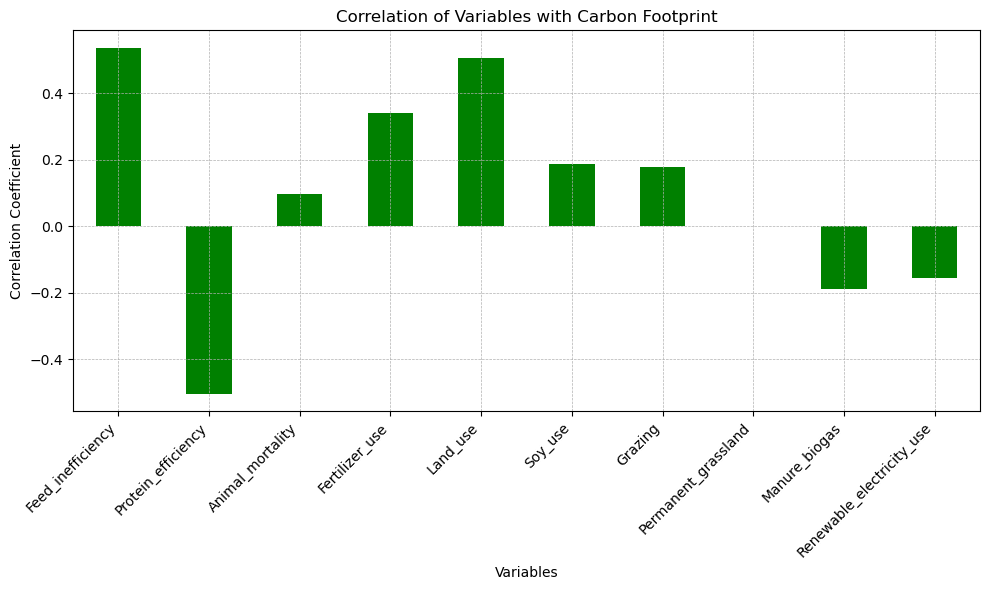

In [83]:
# Plot the correlation with Carbon Footprint
variables = kpi_columns + ['Carbon_footprint']
correlations = df[variables].corr()['Carbon_footprint'].drop('Carbon_footprint')

plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color='green')
plt.title('Correlation of Variables with Carbon Footprint')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [85]:
kpi_columns = ['Feed_inefficiency', 'Protein_efficiency', 'Animal_mortality', 
               'Fertilizer_use', 'Land_use']

In [59]:
# Sort and display top 10 and bottom 10 farms by Carbon Footprint
top_10_farms = df.sort_values('Carbon_footprint').head(10)
top_10_farms_summary = top_10_farms[kpi_columns]

print("Top 10 Farms (Least Emissions):\n", top_10_farms_summary)

top_10_mean = top_10_farms_summary.mean()
print("\nMean KPI Values for Top 10 Farms (Least Emissions):\n", top_10_mean)

print("Top 10 Farms (Least Emissions):\n", top_10_farms_summary)

# Sort and display the bottom 10 farms with the highest carbon emissions
bottom_10_farms = df.sort_values('Carbon_footprint', ascending=False).head(10)
bottom_10_farms_summary = bottom_10_farms[kpi_columns]

print("\nBottom 10 Farms (Most Emissions):\n", bottom_10_farms_summary)

# Calculate the mean of KPI values for the top 10 farms (least emissions)
top_10_mean = top_10_farms_summary.mean()
print("\nMean KPI Values for Top 10 Farms (Least Emissions):\n", top_10_mean)

# Calculate the mean of KPI values for the bottom 10 farms (most emissions)
bottom_10_mean = bottom_10_farms_summary.mean()
print("\nMean KPI Values for Bottom 10 Farms (Most Emissions):\n", bottom_10_mean)


Top 10 Farms (Least Emissions):
      Feed_inefficiency  Protein_efficiency  Animal_mortality  Fertilizer_use  \
1                0.709              37.567             3.632         113.857   
2                0.846              37.200             1.782          82.786   
6                0.783              34.796             3.033         115.894   
9                0.712              35.836             8.633         203.868   
10               0.781              36.181             1.672         135.161   
37               0.727              38.245             4.028         115.406   
3                0.720              33.753             1.720         192.435   
8                0.714              29.994             1.330         182.944   
113              0.805              36.035             8.443          85.330   
12               0.727              37.947             1.079         221.697   

     Land_use  
1       1.058  
2       0.836  
6       0.805  
9       0.681  
10    

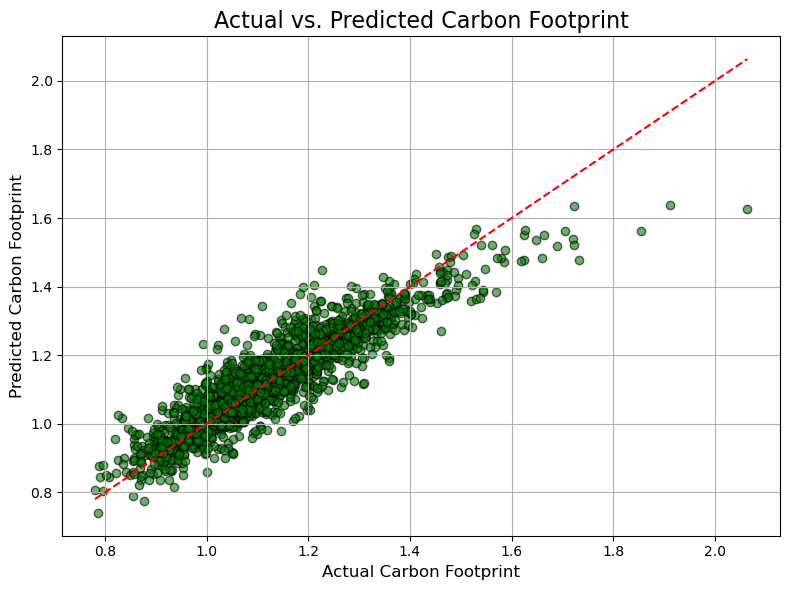

Mean Squared Error: 0.003747511687797632
R-squared: 0.8305762465981932
Regression Coefficients:
                     Coefficient
Feed_inefficiency      0.330354
Protein_efficiency    -0.004423
Animal_mortality       0.004951
Fertilizer_use         0.001076
Land_use               0.178304


In [61]:
# Regression analysis
X = df[kpi_columns]
y = df['Carbon_footprint']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot the actual vs the predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 

# Add labels and title
plt.title('Actual vs. Predicted Carbon Footprint', fontsize=16)
plt.xlabel('Actual Carbon Footprint', fontsize=12)
plt.ylabel('Predicted Carbon Footprint', fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Model evaluation
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Regression Coefficients:\n", coefficients)



Comparison for Selected Farm (Index 19):
                   KPI  Farm KPI Values  Target (Top 10 Farms Mean)  \
0   Feed_inefficiency            0.707                      0.7524   
1  Protein_efficiency           31.383                     35.7554   
2    Animal_mortality            1.505                      3.5352   
3      Fertilizer_use          109.146                    144.9378   
4            Land_use            1.269                      0.7934   

   Difference  Weighted Difference  
0      0.0454             0.014998  
1      4.3724             0.019339  
2      2.0302             0.010052  
3     35.7918             0.038508  
4     -0.4756            -0.084801  

The five KPI for Reducing Carbon Footprint – In Priority Order: ['Fertilizer_use', 'Protein_efficiency', 'Feed_inefficiency', 'Animal_mortality', 'Land_use']

Impact on carbon footprint for selected farm (Index 19) after improving top 5 KPIs: 0.7216


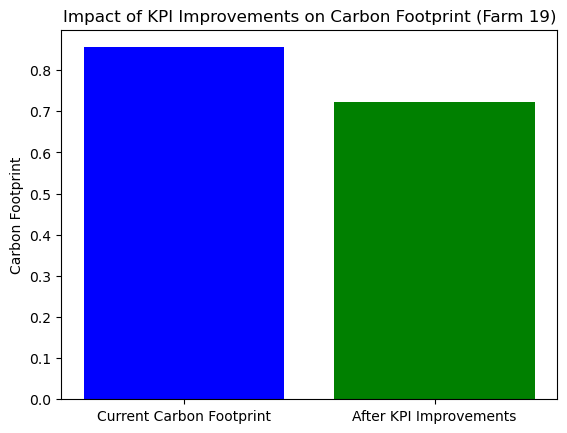

In [73]:
# Sort by carbon footprint
df_sorted = df.sort_values('Carbon_footprint')


target_values = df_sorted[kpi_columns].head(10).mean()  # Target - top 10 farms
coefficients = abs(model.coef_) 

def scenario_analysis(baseline_values, changes, coefficients):
    adjusted_values = baseline_values + changes
    return np.dot(adjusted_values, coefficients)

# Selecting a specific farm
farm_index = 19  
farm = df.iloc[farm_index]  

# difference between the selected farm and the target values 
difference_values = target_values - farm[kpi_columns]

# weighted differences using the regression coefficients
weighted_difference_values = difference_values * coefficients

# Sort the weighted differences to find the top 5 KPIs for improvement
top_5_weighted_differences = weighted_difference_values.nlargest(5)

# Display the comparison table for the selected farm
comparison_table = pd.DataFrame({
    'KPI': kpi_columns,
    'Farm KPI Values': farm[kpi_columns].values,
    'Target (Top 10 Farms Mean)': target_values.values,
    'Difference': difference_values.values,
    'Weighted Difference': weighted_difference_values.values
})

print(f"\nComparison for Selected Farm (Index {farm_index}):\n", comparison_table)

# Get the top 5 KPIs ordered by priority
top_5_kpis = top_5_weighted_differences.index
print(f"\nThe five KPI for Reducing Carbon Footprint – In Priority Order: {top_5_kpis.tolist()}")

# Define the scenario based on the top 5 KPIs
changes_scenario = np.zeros(len(kpi_columns))
for kpi in top_5_kpis:
    changes_scenario[kpi_columns.index(kpi)] = difference_values[kpi]

# TO calculate the new carbon footprint after improvements
result_scenario = scenario_analysis(farm[kpi_columns].values, changes_scenario, coefficients)

# Display the result
print(f"\nImpact on carbon footprint for selected farm (Index {farm_index}) after improving top 5 KPIs: {result_scenario:.4f}")

# Visualizing the impact on carbon footprint
plt.bar(['Current Carbon Footprint', 'After KPI Improvements'], 
        [farm['Carbon_footprint'], result_scenario], color=['blue', 'green'])
plt.title(f'Impact of KPI Improvements on Carbon Footprint (Farm {farm_index})')
plt.ylabel('Carbon Footprint')
plt.show()
